Input Data (X):
 [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877]
 [-0.2257763   0.0675282  -1.42474819]]

Layer 1 (ReLU):
 [[0.5   0.086 0.    0.    0.   ]
 [0.    1.334 0.    0.919 0.   ]
 [0.    1.025 0.    1.387 0.   ]
 [0.    1.646 0.    1.007 0.482]
 [0.    4.022 0.    3.381 3.868]
 [1.057 0.902 0.    0.    0.691]
 [2.309 0.    0.    0.    0.   ]
 [0.    2.412 0.259 2.591 1.655]]

Layer 2 (Tanh):
 [[ 0.103  0.688 -0.268  0.905]
 [ 0.462 -0.856  0.581  0.882]
 [ 0.    -0.706  0.617  0.961]
 [ 0.293 -0.96   0.256  0.65 ]
 [-0.987 -1.    -0.959 -0.954]
 [-0.648 -0.809 -0.774  0.739]
 [-0.989 -0.296 -0.813  0.998]
 [-0.905 -0.999  0.003  0.698]]

Final Output (Softmax):
 [[0.047 0.953]
 [0.108 0.892]
 [0.044 0.956]
 [0.302 0.698]
 [0.995 0.005]
 [0.35  0.65 ]
 [0.

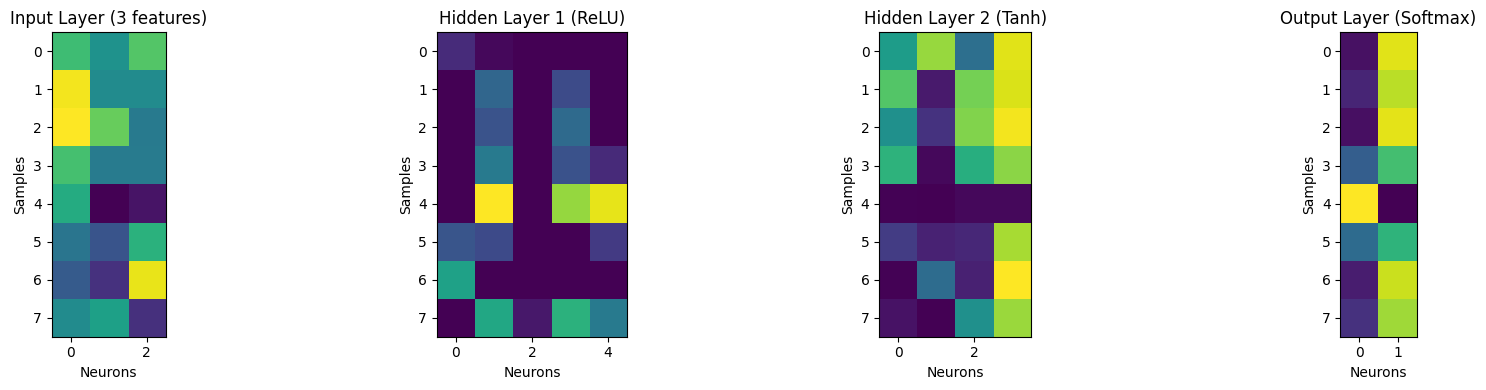


Cross-Entropy Loss: 1.9941


In [1]:
# Deep Neural Network Forward Propagation (ReLU + Tanh + Softmax)
# Author: [Your Name]
# Date: October 22, 2025

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Step 1: Create sample dataset
# -------------------------------
np.random.seed(42)
X = np.random.randn(8, 3)  # 8 samples, 3 features
print("Input Data (X):\n", X)

# -------------------------------
# 2️⃣ Step 2: Initialize weights and biases
# -------------------------------
W1 = np.random.randn(3, 5)
b1 = np.random.randn(1, 5)

W2 = np.random.randn(5, 4)
b2 = np.random.randn(1, 4)

W3 = np.random.randn(4, 2)
b3 = np.random.randn(1, 2)

# -------------------------------
# 3️⃣ Step 3: Define activation functions
# -------------------------------
def relu(Z):
    return np.maximum(0, Z)

def tanh(Z):
    return np.tanh(Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # numerical stability
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

# -------------------------------
# 4️⃣ Step 4: Forward propagation
# -------------------------------
Z1 = np.dot(X, W1) + b1
A1 = relu(Z1)
print("\nLayer 1 (ReLU):\n", np.round(A1, 3))

Z2 = np.dot(A1, W2) + b2
A2 = tanh(Z2)
print("\nLayer 2 (Tanh):\n", np.round(A2, 3))

Z3 = np.dot(A2, W3) + b3
A3 = softmax(Z3)
print("\nFinal Output (Softmax):\n", np.round(A3, 3))

# -------------------------------
# 5️⃣ Step 5: Visualization
# -------------------------------
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].imshow(X, cmap='viridis')
axs[0].set_title("Input Layer (3 features)")
axs[1].imshow(A1, cmap='viridis')
axs[1].set_title("Hidden Layer 1 (ReLU)")
axs[2].imshow(A2, cmap='viridis')
axs[2].set_title("Hidden Layer 2 (Tanh)")
axs[3].imshow(A3, cmap='viridis')
axs[3].set_title("Output Layer (Softmax)")

for ax in axs:
    ax.set_xlabel("Neurons")
    ax.set_ylabel("Samples")

plt.tight_layout()
plt.show()

# -------------------------------
# 6️⃣ (Optional Bonus) Loss Computation
# -------------------------------
# Assume true labels (one-hot encoded for simplicity)
y_true = np.array([[1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1]])

# Cross-entropy loss
loss = -np.mean(np.sum(y_true * np.log(A3 + 1e-9), axis=1))
print("\nCross-Entropy Loss:", np.round(loss, 4))
